@article{Pilgrim2021, 
         doi = {10.21105/joss.03859}, 
         url = {https://doi.org/10.21105/joss.03859}, 
         year = {2021}, publisher = {The Open Journal}, 
         volume = {6}, 
         number = {68}, 
         pages = {3859}, 
         author = {Charlie Pilgrim}, 
         title = {piecewise-regression (aka segmented regression) in Python}, 
         journal = {Journal of Open Source Software}
        }

In [1]:
# General-level imports:
import os
import datetime

import pandas as pd

# For data-reading capabilities:
from seppy.tools import Event

# Importing the Regression-Onset tool:
import reg

### Use either SEPpy to acquire the desired data, or directly choose your own file below:

In [11]:
import seppy.tools.widgets as w
display(w.spacecraft_drop, w.sensor_drop, w.view_drop, w.species_drop)

Dropdown(description='Spacecraft:', options=('PSP', 'SOHO', 'Solar Orbiter', 'STEREO-A', 'STEREO-B', 'Wind'), …

Dropdown(description='Sensor:', options=('isois-epihi', 'isois-epilo'), value='isois-epihi')

Dropdown(description='Viewing:', options=('A', 'B'), value='A')

Dropdown(description='Species:', options=('protons', 'electrons'), value='protons')

In [2]:
# To download (or load if files are locally present) SEPpy data, one needs to provide a time span.
start_date = datetime.datetime(2022, 1, 20)
end_date =  datetime.datetime(2022, 1, 21)

seppy_data = Event(spacecraft=w.spacecraft_drop.value, sensor=w.sensor_drop.value, species=w.species_drop.value,
                     start_date=start_date, end_date=end_date, data_level="l2",
                     data_path="data/", viewing=w.view_drop.value)

In [3]:
df = reg.externals.export_seppy_data(event=seppy_data)

In [4]:
df

,Electron_Flux_0,Electron_Flux_1,Electron_Flux_2,Electron_Flux_3,Electron_Flux_4,Electron_Flux_5,Electron_Flux_6,Electron_Flux_7,Electron_Flux_8,Electron_Flux_9,...,Electron_Flux_24,Electron_Flux_25,Electron_Flux_26,Electron_Flux_27,Electron_Flux_28,Electron_Flux_29,Electron_Flux_30,Electron_Flux_31,Electron_Flux_32,Electron_Flux_33
Time,,,,,,,,,,,,,,,,,,,,,
2022-01-20 00:00:00.951561216,NaN,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2022-01-20 00:00:01.951562880,NaN,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,13711.96582,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2022-01-20 00:00:02.951564544,NaN,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2022-01-20 00:00:03.951566208,NaN,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2022-01-20 00:00:04.951568000,NaN,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-21 23:59:56.247030912,NaN,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2022-01-21 23:59:57.247032576,NaN,0.000000,29502.353516,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2022-01-21 23:59:58.247034240,NaN,36652.589844,0.000000,0.0,24958.568359,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


## If you used SEPpy to acquire data, do not run the next cell

In [13]:
path = f"data{os.sep}"
filenames = ["phys_data_2023-03-12_side0.csv",
            "simulated_event_profiles.csv",
            "solo_ept_sun_e.csv"]

index_col_names = ["TimeUTC",
                  "datetime",
                  "datetime"]

index = 2

df = pd.read_csv(f"{path}{filenames[index]}", parse_dates=True, index_col=index_col_names[index])

In [12]:
# Check the dataframe
display(df)

,Electron_Flux_0,Electron_Flux_1,Electron_Flux_2,Electron_Flux_3,Electron_Flux_4,Electron_Flux_5,Electron_Flux_6,Electron_Flux_7,Electron_Flux_8,Electron_Flux_9,...,Electron_Flux_24,Electron_Flux_25,Electron_Flux_26,Electron_Flux_27,Electron_Flux_28,Electron_Flux_29,Electron_Flux_30,Electron_Flux_31,Electron_Flux_32,Electron_Flux_33
Time,,,,,,,,,,,,,,,,,,,,,
2022-01-20 00:00:00.951561216,NaN,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2022-01-20 00:00:01.951562880,NaN,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,13711.96582,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2022-01-20 00:00:02.951564544,NaN,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2022-01-20 00:00:03.951566208,NaN,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2022-01-20 00:00:04.951568000,NaN,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-21 23:59:56.247030912,NaN,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2022-01-21 23:59:57.247032576,NaN,0.000000,29502.353516,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2022-01-21 23:59:58.247034240,NaN,36652.589844,0.000000,0.0,24958.568359,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


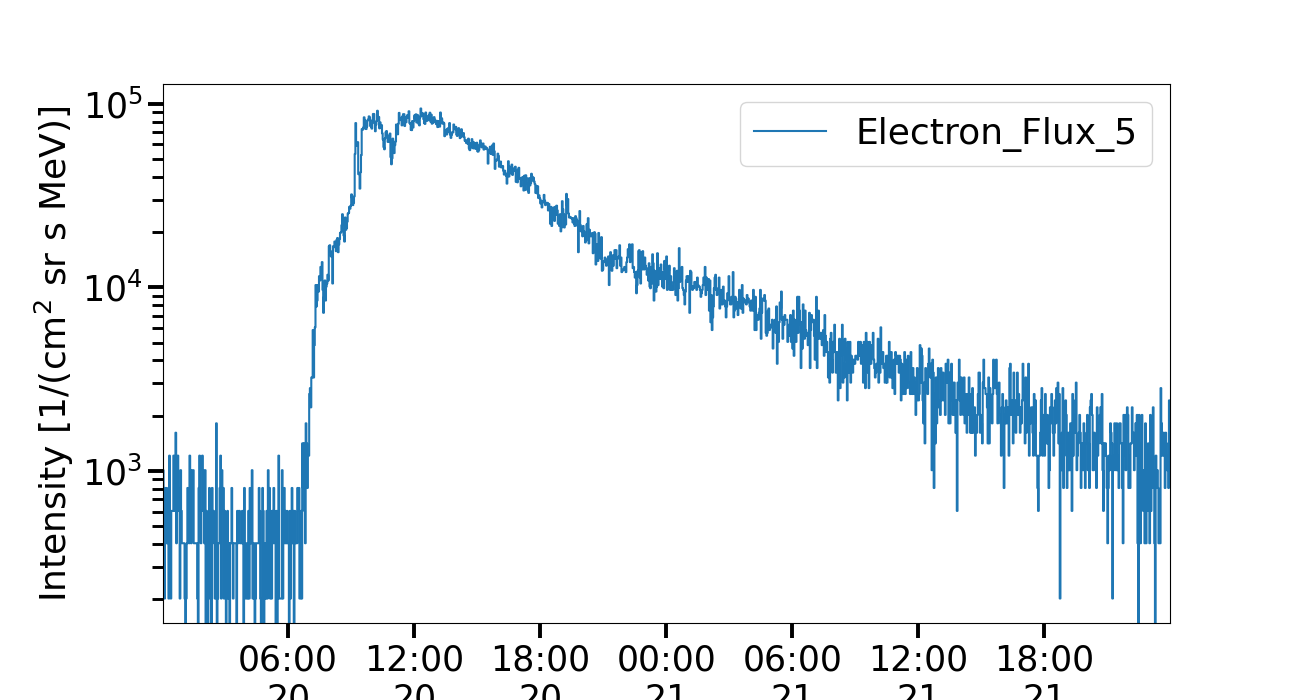

In [5]:
# Initializing the tool with input data
event = reg.Reg(data=df)

# Choose the channel(s) to examine in quicklook plot
channel = "Electron_Flux_5"

# 
%matplotlib ipympl
event.quicklook(channel=channel, resample="2 min") #selection=["2022-01-20 02:00", "2022-01-20 12:00"]

Data selection: 2022-01-20 00:00:30.951561216, 2022-01-20 12:18:30.951561216
Regression converged: True


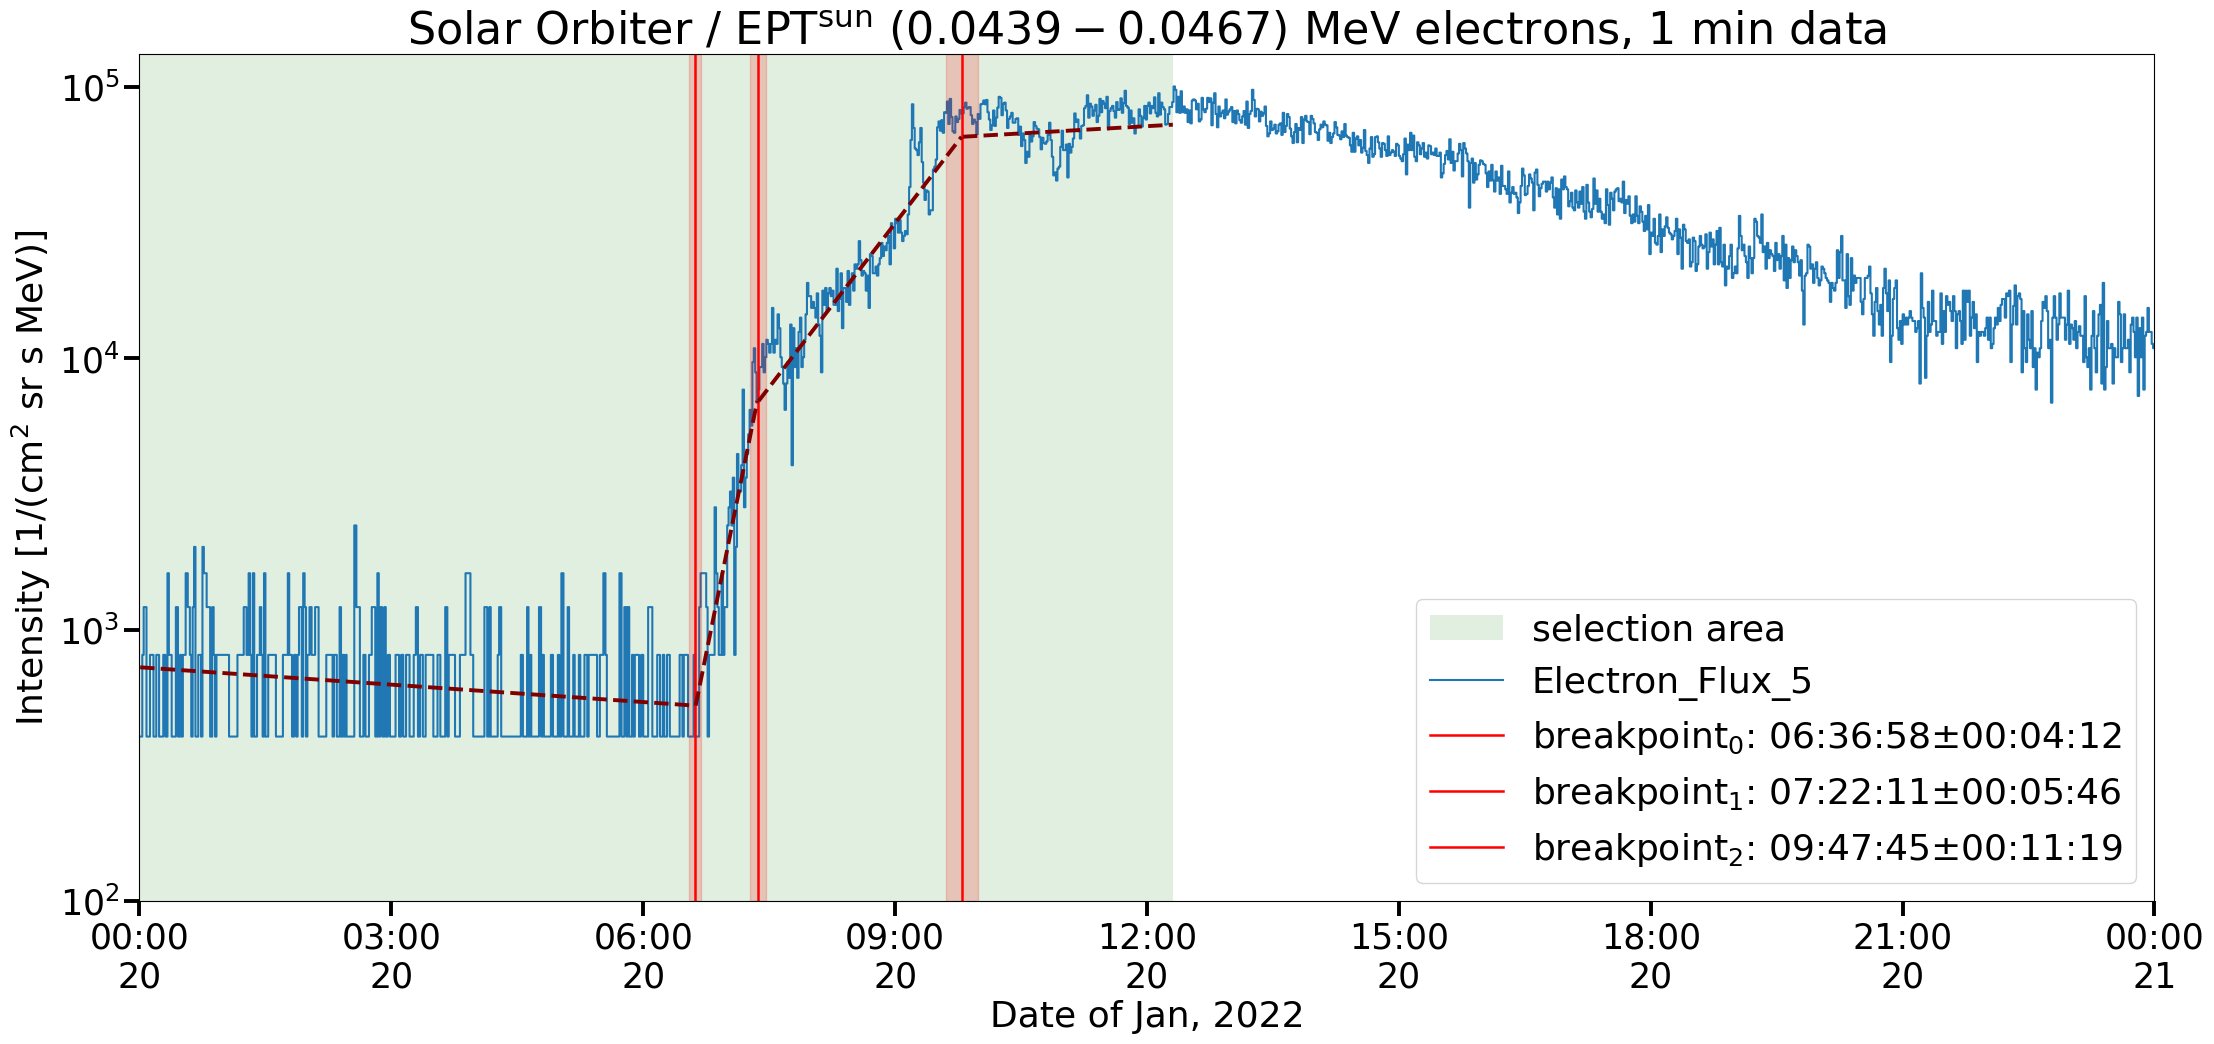

In [8]:
# Title for the figure (optional)
title = r"Solar Orbiter / EPT$^{\mathrm{sun}}$ ($0.0439 - 0.0467$) MeV electrons, 1 min data"

# The channel to consider
#channel = "E5"

# The number of breakpoints to seek from the data selection
num_of_breaks = 3

%matplotlib inline
results  = event.find_breakpoints(channel=channel, breaks=num_of_breaks,
                                  xlim=["2022-01-20 00:00", "2022-01-21 00:00"], 
                                  title=title, diagnostics=True, resample="1 min")

## Display the results:
#### the results are a dictionary that contains the parameters of the fits (constant and slopes), the breakpoints and their 95% confidence intervals, the figure and its axes.

In [9]:
display(results)

{'const': np.float64(9755.26442312627),
 'alpha0': np.float64(-5.937041742294787e-06),
 'alpha1': np.float64(0.00042523734096870436),
 'alpha2': np.float64(0.00011193653894104569),
 'alpha3': np.float64(4.9357901498448925e-06),
 'breakpoint0': Timestamp('2022-01-20 06:36:58.852079391'),
 'breakpoint1': Timestamp('2022-01-20 07:22:11.387469053'),
 'breakpoint2': Timestamp('2022-01-20 09:47:45.488800764'),
 'breakpoint0_errors': (Timestamp('2022-01-20 06:32:46.840984583'),
  Timestamp('2022-01-20 06:41:10.863174200')),
 'breakpoint1_errors': (Timestamp('2022-01-20 07:16:24.950906277'),
  Timestamp('2022-01-20 07:27:57.824031830')),
 'breakpoint2_errors': (Timestamp('2022-01-20 09:36:26.151172161'),
  Timestamp('2022-01-20 09:59:04.826429367')),
 'fig': <Figure size 2600x1100 with 1 Axes>,
 'ax': <Axes: title={'center': 'Solar Orbiter / EPT$^{\\mathrm{sun}}$ ($0.0439 - 0.0467$) MeV electrons, 1 min data'}, xlabel='Date of Jan, 2022', ylabel='Intensity [1/(cm$^{2}$ sr s MeV)]'>,
 'series':

## Saving the figure:

In [7]:
figure_name = "name_for_your_figure.png"

results["fig"].savefig(figure_name, facecolor="white", transparent=False, bbox_inches="tight")